<a href="https://colab.research.google.com/github/setyanoegraha/college-computer-vision-2025/blob/main/jobsheet-02/jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 02: KLASIFIKASI GAMBAR

In [ ]:
!pip install -r https://raw.githubusercontent.com/setyanoegraha/college-computer-vision-2025/main/requirements.txt

## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

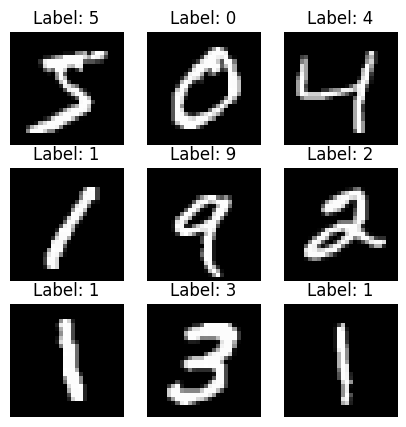

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure (figsize=(5, 5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

Tugas kecil: coba ganti range(9) dengan range(25) untuk menampilkan banyak contoh.

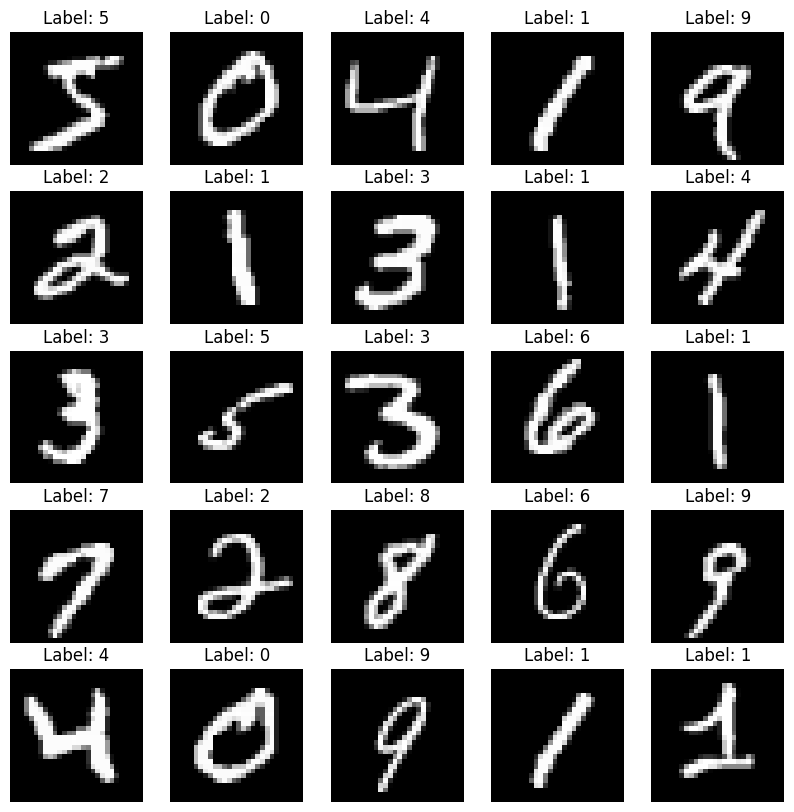

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure (figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

Apa yang anda perhatikan dari bentuk tulisan tangan manusia?
- bentuk angka sangat bervariasi meskipun labelnya sama, misalnya angka "1" ada yang hanya berupa garis lurus, ada juga yang diberi kait kecil di atas.
- Ketebalan, ukuran, dan kelurusan garis berbeda-beda, menunjukkan perbedaan gaya menulis tiap orang.
- Posisi angka tidak selalu di tengah, ada yang agak miring atau bergeser ke atas, bawah, kiri, maupun kanan.
- Beberapa digit terlihat jelas, tetapi ada juga yang kurang rapi.

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi: ", accuracy_score(y_test, y_pred))

Akurasi:  0.9101


Tugas kecil: ubah kernel dari linear menjadi rbf

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi: ", accuracy_score(y_test, y_pred))

Akurasi:  0.9513


Bagaimana pengaruhnya terhadap akurasi?
- mengganti kernel dari linear ke RBF meningkatkan akurasi dari 91.01% menjadi 95.13%. Hal ini karena kernel RBF lebih fleksibel dalam memisahkan data yang tidak sepenuhnya linier, sehingga mampu mengenali pola tulisan tangan MNIST dengan lebih baik dibanding kernel linear.

## Praktikum D3 - Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8964 - loss: 0.3551 - val_accuracy: 0.9798 - val_loss: 0.0770
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9811 - loss: 0.0635 - val_accuracy: 0.9870 - val_loss: 0.0503
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9883 - loss: 0.0388 - val_accuracy: 0.9863 - val_loss: 0.0468
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9853 - val_loss: 0.0572
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9845 - val_loss: 0.0574


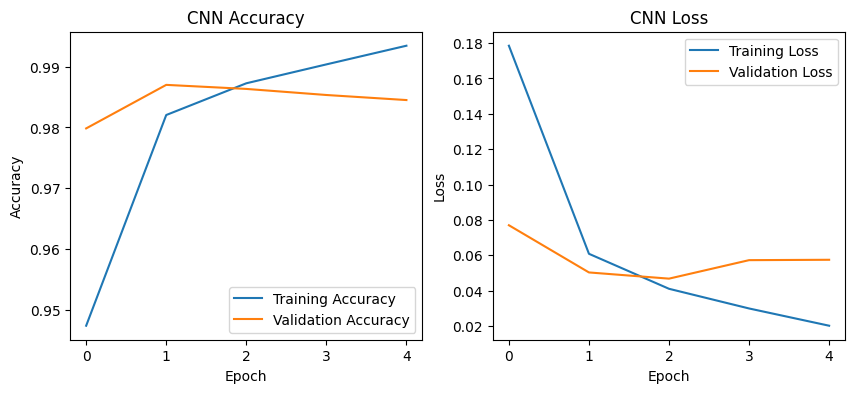

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.8961 - loss: 0.3337 - val_accuracy: 0.9835 - val_loss: 0.0557
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.9843 - loss: 0.0526 - val_accuracy: 0.9892 - val_loss: 0.0359
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9902 - loss: 0.0326 - val_accuracy: 0.9910 - val_loss: 0.0295
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.9902 - val_loss: 0.0347
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9895 - val_loss: 0.0417


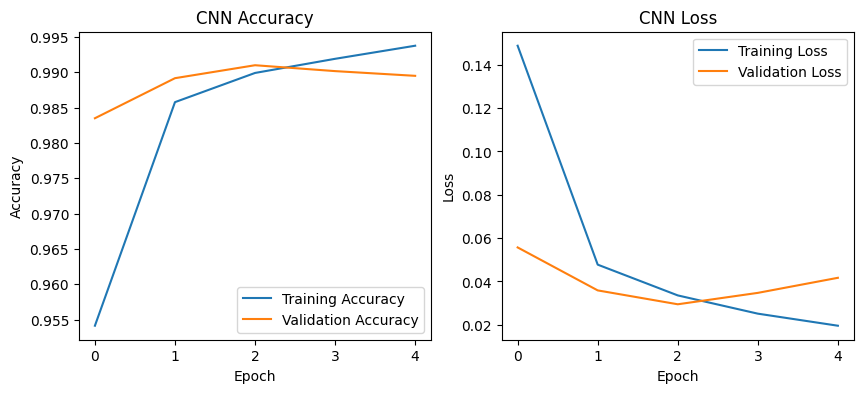

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), # Added Conv2D layer
    layers.MaxPooling2D((2, 2)), # Added MaxPooling2D layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Apakah akurasinya meningkat?
- dengan menambahkan satu lapisan Conv2D sebelum Flatten, akurasi validasi meningkat dari 98.70% menjadi 99.10%. Hal ini menunjukkan bahwa lapisan konvolusi tambahan mampu mengekstraksi fitur lebih kompleks dari gambar, sehingga model lebih baik dalam mengenali pola tulisan tanga.

## Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.3672 - loss: 1.7140 - val_accuracy: 0.5518 - val_loss: 1.2494
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.5909 - loss: 1.1642 - val_accuracy: 0.6424 - val_loss: 1.0289
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.6455 - loss: 1.0103 - val_accuracy: 0.6668 - val_loss: 0.9704
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.6778 - loss: 0.9168 - val_accuracy: 0.6794 - val_loss: 0.9166
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7077 - loss: 0.8366 - val_accuracy: 0.6992 - val_loss: 0.8958
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7280 - loss: 0.7827 - val_accuracy: 0.6994 - val_loss: 0.8752
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7454 - loss: 0.7294 - val_accuracy: 0.7070 - val_loss: 0.8824
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.7631 -

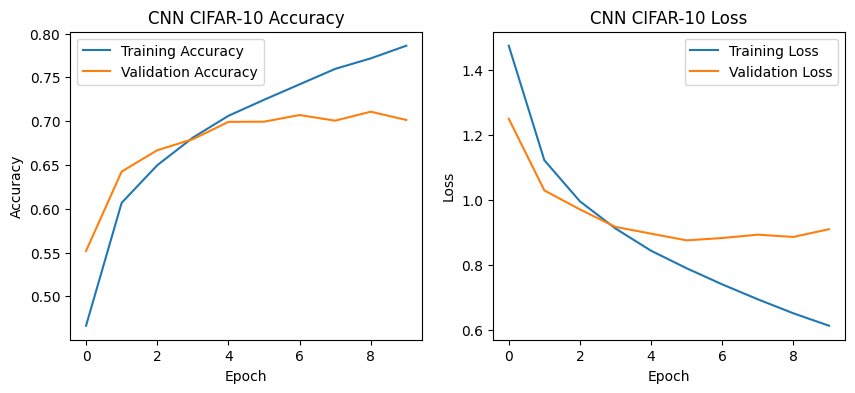

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas kecil: coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.2586 - loss: 1.9841 - val_accuracy: 0.4776 - val_loss: 1.4775
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.4395 - loss: 1.5362 - val_accuracy: 0.5362 - val_loss: 1.2921
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5070 - loss: 1.3630 - val_accuracy: 0.6084 - val_loss: 1.1216
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.5445 - loss: 1.2742 - val_accuracy: 0.6246 - val_loss: 1.0717
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.5698 - loss: 1.2079 - val_accuracy: 0.6564 - val_loss: 0.9925
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.5882 - loss: 1.1583 - val_accuracy: 0.6656 - val_loss: 0.9853
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.6003 - loss: 1.1140 - val_accuracy: 0.6648 - val_loss: 0.9714
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.6111 -

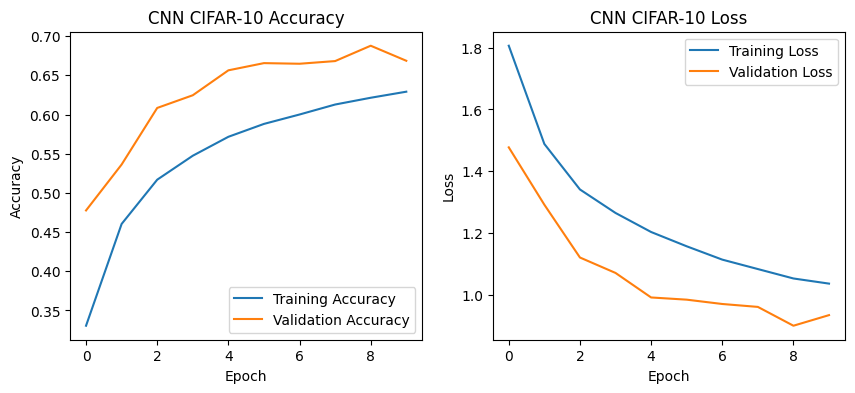

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Added Dropout layer
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Apa pengaruhnya pada overfitting?
- Penambahan Dropout(0.5) sebelum lapisan Dense terakhir mengurangi overfitting, ditandai dengan selisih akurasi training dan validasi yang lebih kecil. Namun, hal ini juga menurunkan akurasi training secara signifikan karena model dipaksa untuk tidak terlalu bergantung pada neuron tertentu.

## Praktikum D5 - Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 561s 398ms/step - accuracy: 0.4493 - loss: 1.5733 - val_accuracy: 0.5714 - val_loss: 1.2226
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 531s 376ms/step - accuracy: 0.5801 - loss: 1.2089 - val_accuracy: 0.5968 - val_loss: 1.1518
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 590s 396ms/step - accuracy: 0.6071 - loss: 1.1285 - val_accuracy: 0.6028 - val_loss: 1.1374
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 527s 375ms/step - accuracy: 0.6145 - loss: 1.1005 - val_accuracy: 0.6048 - val_loss: 1.1177
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 562s 375ms/step - accuracy: 0.6297 - loss: 1.0565 - val_accuracy: 0.6162 - val_loss: 1.1037


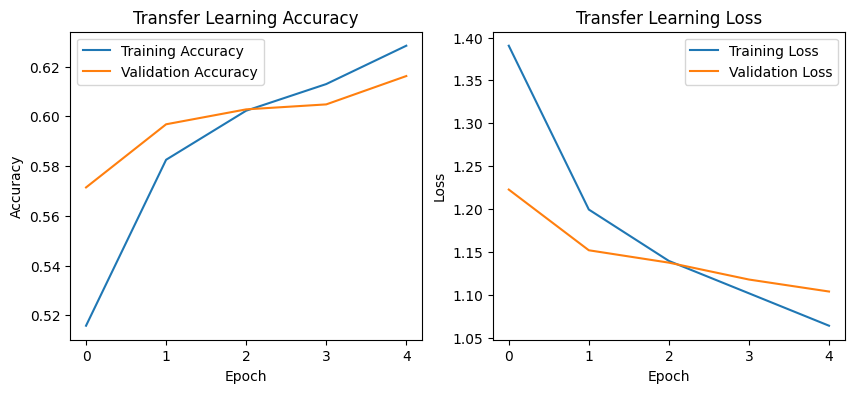

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32, 32, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas Kecil: Coba aktifkan 1-2 lapisan terakhir dari base_model (fine-tunning)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2270s 2s/step - accuracy: 0.5296 - loss: 1.3439 - val_accuracy: 0.6766 - val_loss: 0.9336
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2222s 2s/step - accuracy: 0.7110 - loss: 0.8475 - val_accuracy: 0.7064 - val_loss: 0.8715
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2257s 2s/step - accuracy: 0.7538 - loss: 0.7222 - val_accuracy: 0.7326 - val_loss: 0.7988
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2195s 2s/step - accuracy: 0.7725 - loss: 0.6558 - val_accuracy: 0.7374 - val_loss: 0.7936
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2161s 2s/step - accuracy: 0.7970 - loss: 0.5814 - val_accuracy: 0.7310 - val_loss: 0.7912


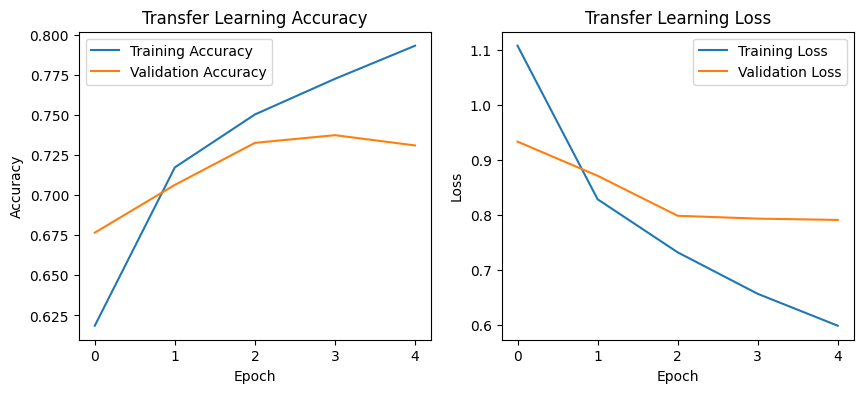

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32, 32, 3))
# Freeze all layers in the base model initially
base_model.trainable = False

# Unfreeze the last two convolutional blocks for fine-tuning
for layer in base_model.layers[-4:]: # Unfreeze the last 4 layers which correspond to the last two conv blocks
    layer.trainable = True


model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Recompile the model after unfreezing layers
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Use a lower learning rate for fine-tuning
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Bagaimana akurasinya berubah?
- dengan mengaktifkan 1-2 lapisan terakhir base_model (fine-tuning), akurasi meningkat dari sekitar 61.6% menjadi 73.7%. Hal ini menunjukkan bahwa fine-tuning membantu model menyesuaikan representasi fitur pretrained dengan dataset baru, meskipun membutuhkan waktu training yang lebih lama.

## Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 380ms/step
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1000
           1       0.80      0.86      0.83      1000
           2       0.67      0.65      0.66      1000
           3       0.65      0.42      0.51      1000
           4       0.79      0.53      0.63      1000
           5       0.59      0.67      0.62      1000
           6       0.68      0.82      0.75      1000
           7       0.73      0.84      0.78      1000
           8       0.81      0.86      0.84      1000
           9       0.82      0.76      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



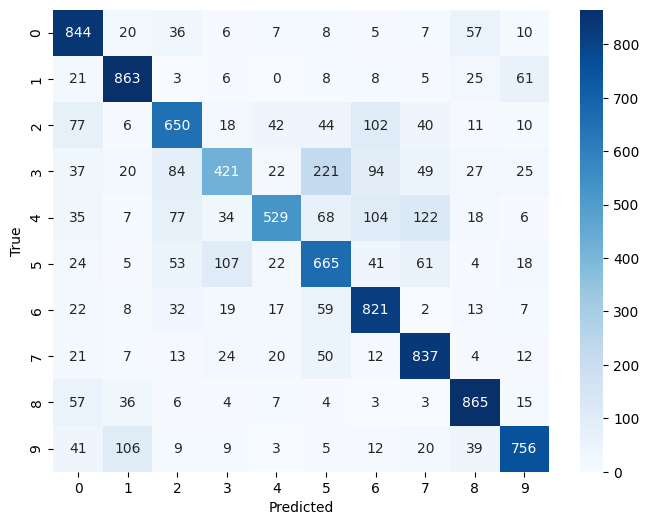

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Tugas kecil: Dari confusion matrix, identifikasi kelas apa yang paling sering salah diklasifikasikan. Menurut Anda, mengapa hal itu bisa terjadi?
- Kelas yang paling sering salah diklasifikasikan adalah kelas 3 dan kelas 4.
  - kelas 3 hanya memiliki recall 0.42 artinya, banyak angka "3" yang salah diprediksi menjadi angka lain.
  - kelas 4 juga memiliki recall rendah 0.53 artinya banyak angka "4" yang salah diprediksi menjadi angka mirip.

- hal ini terjadi karena bentuk tulisan tangan angka tersebut sering menyerupai kelas lain (misalnya 3 mirip 5 atau 8, sedangkan 4 mirip 9 atau 7), ditambah variasi gaya penulisan yang tinggi sehingga model sulit membedakan pola visualnya secara konsisten.

## Penugasan

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.8925 - loss: 0.3689 - val_accuracy: 0.9797 - val_loss: 0.0712
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9800 - loss: 0.0669 - val_accuracy: 0.9838 - val_loss: 0.0597
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9870 - loss: 0.0438 - val_accuracy: 0.9862 - val_loss: 0.0588
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9877 - val_loss: 0.0539
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9931 - loss: 0.0228 - val_accuracy: 0.9873 - val_loss: 0.0530


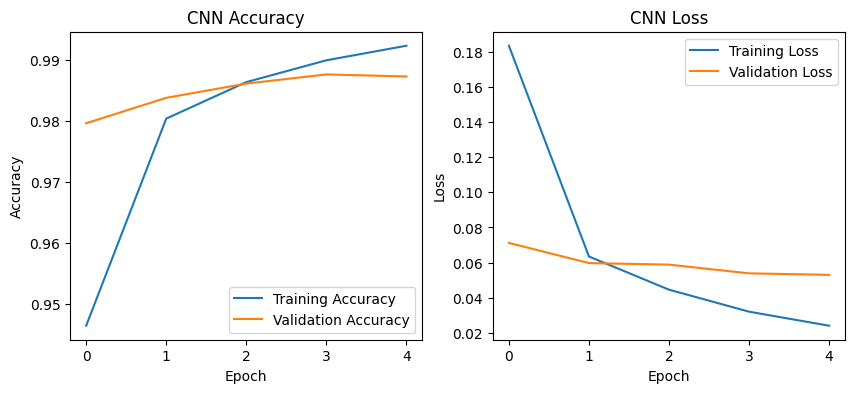

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist # Import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Add data loading

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [3]:
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr


Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 7.jpg to 7.jpg


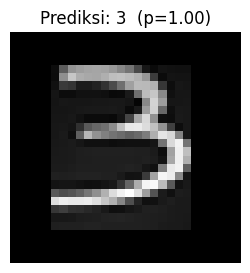

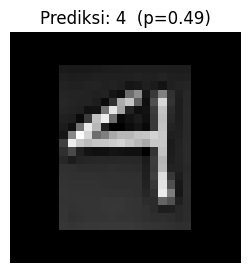

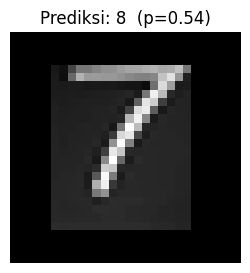

Rekap Prediksi (CNN):
- 3.jpg -> 3 (p=0.997)
- 4.jpg -> 4 (p=0.490)
- 7.jpg -> 8 (p=0.539)


In [4]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)            # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]   # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred}  (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


Hasil pengujian menunjukkan bahwa:

- Angka 3 diprediksi dengan sangat akurat karena bentuknya mirip dengan data MNIST.

- Angka 4 berhasil dikenali, tetapi tingkat keyakinannya rendah. Hal ini mungkin disebabkan oleh garis tulisan yang tipis dan berbeda gaya dari digit MNIST.

- Angka 7 salah dikenali sebagai 8. Kesalahan ini kemungkinan disebabkan pencahayaan yang kurang merata, garis tipis, serta gaya tulisan yang berbeda dengan contoh di dataset MNIST.